In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset

uber = pd.read_csv('C:/Users/USER/uber-raw-data-apr14.csv')

In [3]:
#Display the head of the dataset
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
#generating some information about our data...
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
#Check if there are any missing values

def num_missing(x):
    return sum(x.isnull())
print("Number of missing/null values per column")
uber.apply(num_missing, axis=0)

Number of missing/null values per column


Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [6]:
uber.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
# Extract additional information
# 0 =monday, 1 =tuesday, ....
#[dt.weekday_name] seem stale, the new norm is [dt.day_name()]

uber['Date/Time'] = pd.to_datetime(uber['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['DayofWeek'] = uber['Date/Time'].dt.day_name()
uber['DayNum'] = uber['Date/Time'].dt.day
uber['HourofDay'] = uber['Date/Time'].dt.hour

In [8]:
# Display the head of the new dataset
uber.tail()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourofDay
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,Wednesday,30,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,Wednesday,30,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,Wednesday,30,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,Wednesday,30,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,2,Wednesday,30,23


In [9]:
# Display the shape, 
#gives the number of rows and columns

uber.shape

(564516, 8)

In [10]:
# Unique base codes
#This provides all the distinct items under that data column

uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [11]:
# Unique DayofWeek

#This provides all the distinct items under that data column

uber['DayofWeek'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

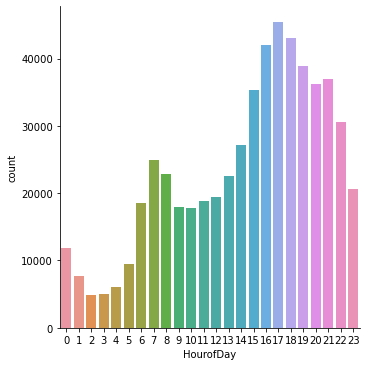

In [12]:
# Total rides based on the HourofDay

sns.catplot(x='HourofDay', kind='count', data=uber)

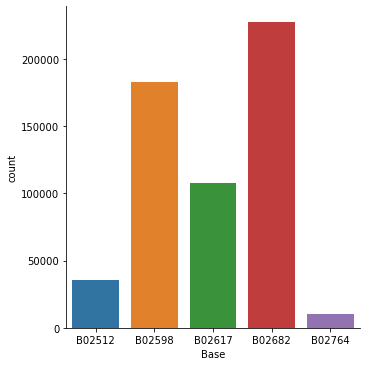

In [13]:
# Total rides based on the base code

sns.catplot(x='Base', kind='count', data=uber)

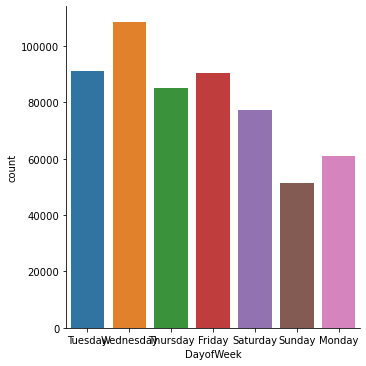

In [14]:
# Total rides based on the DayofWeek

sns.catplot(x='DayofWeek', kind='count', data=uber)

In [15]:
uber_week_report = uber.pivot_table(index=['DayofWeekNum', 'DayofWeek'], values='Base', aggfunc='count')
uber_week_report

,,Base
DayofWeekNum,DayofWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


<AxesSubplot:title={'center':'Day of the week'}, xlabel='DayofWeekNum,DayofWeek'>

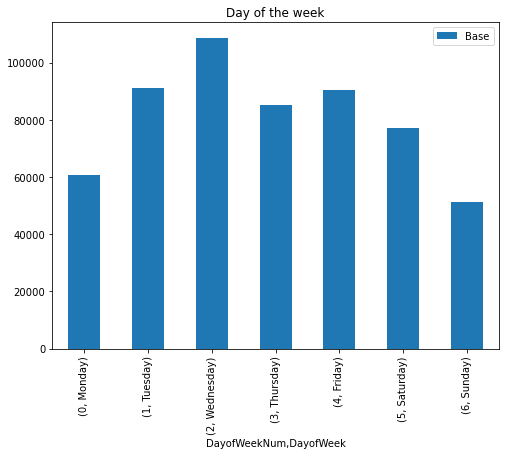

In [16]:
# visualize the pivot table
uber_week_report.plot(kind='bar', figsize=(8,6), title='Day of the week')

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourofDay'>

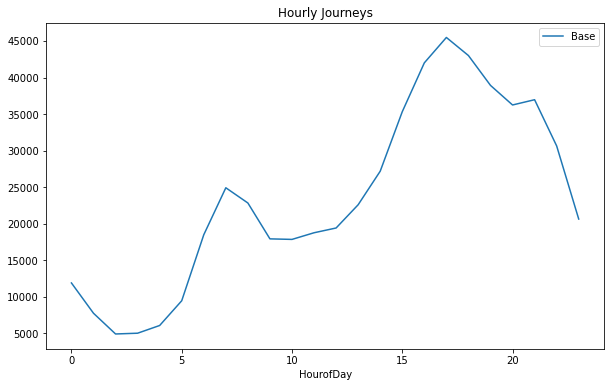

In [17]:
#Number of uber bookings per HourofDay

uber_hourly_data = uber.pivot_table(index=['HourofDay'], values='Base', aggfunc='count')
uber_hourly_data.plot(kind='line', figsize=(10,6), title='Hourly Journeys')

<AxesSubplot:title={'center':'Journeys by DayNum'}, xlabel='DayNum'>

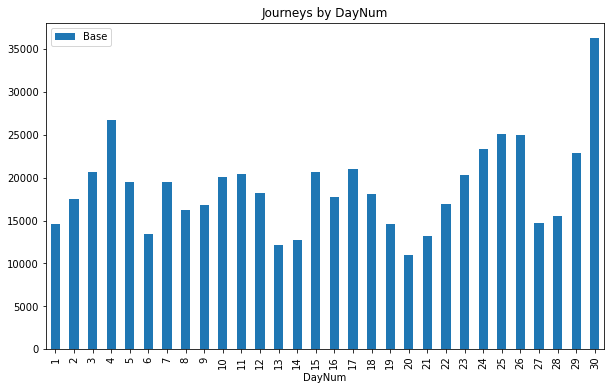

In [18]:
#Number of uber bookings based on each day of the month

uber_day_data = uber.pivot_table(index=['DayNum'], values='Base', aggfunc='count')
uber_day_data.plot(kind='bar', figsize=(10,6), title='Journeys by DayNum')

In [19]:
# .groupby- collects the column 'DayNum'
# .apply- total number of rows per corresponding column
""" 
#.sort_values- sort the bookings in ascending order using its values, 
    if this function is removed, it uses the DayNum from the first day.
"""

def count_rows(rows):
    return len(rows)

by_date = uber.groupby('DayNum').apply(count_rows).sort_values()
by_date

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<AxesSubplot:>

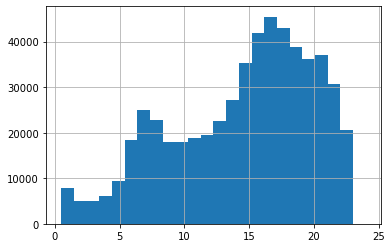

In [20]:
# Analyze the pickup by hours using a histogram

uber.HourofDay.hist(bins=24, range=(.5, 24))


In [21]:
# A cross table to analyze bookings based on DayofWeek and HourofDay

count_rows(uber)
by_hour_weekday = uber.groupby('HourofDay DayofWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
HourofDay,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


<AxesSubplot:xlabel='DayofWeekNum', ylabel='HourofDay'>

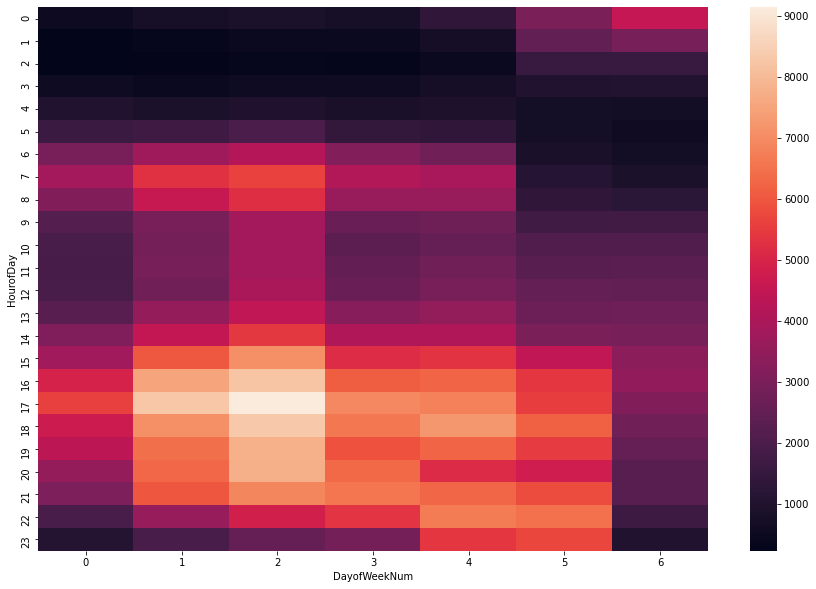

In [22]:
# heat map, the brightest spot shows the day/hour with the highest frequency

plt.figure(figsize=(15,10))
sns.heatmap(by_hour_weekday)

In [23]:
uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourofDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


In [24]:
uber.query('20<Lon<40')[:8]


,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourofDay
